In [3]:
import pandas as pd
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk import sent_tokenize
import numpy as np
import contractions


In [4]:
fake_df = pd.read_csv("Fake.csv")
true_df = pd.read_csv("True.csv")

In [5]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
fake_df["label"] = 0
true_df["label"] = 1

In [8]:
merge_df = pd.concat([fake_df, true_df], axis =0 )

In [9]:
print(merge_df.groupby(['subject']) ['text'].count())

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


<Axes: xlabel='subject'>

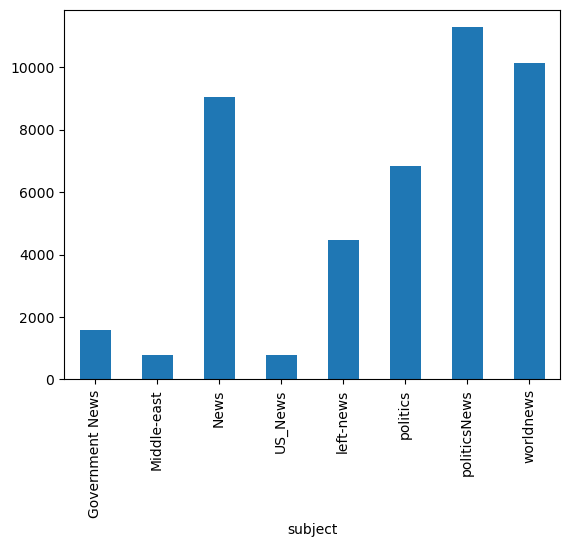

In [10]:
merge_df.groupby(['subject'])['text'].count().plot(kind="bar")

In [11]:

merge_df= merge_df.drop(["subject","date","title"], axis = 1)

merge_df.isnull().sum()

text     0
label    0
dtype: int64

In [12]:
merge_df = merge_df.sample(frac = 1)

In [13]:
merge_df.head()

,text,label
20802,If a black student was assaulted by a white un...,0
11845,The Obama family ended their eight-year reside...,0
13792,Obama s historic Embracing the Communists Tour...,0
15895,It s really interesting to hear this panel go...,0
18178,President Trump put North Korea s brutal dicta...,0


<Axes: xlabel='label'>

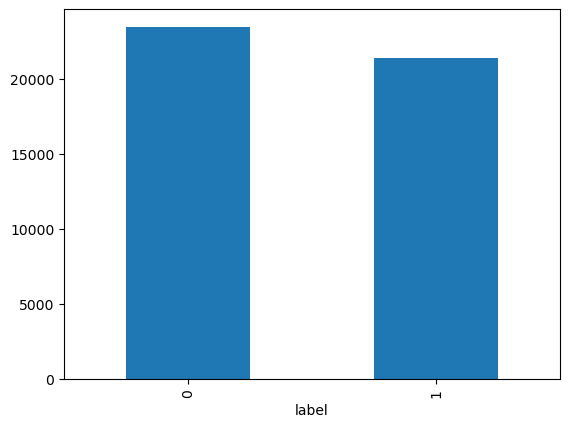

In [14]:
merge_df.groupby(['label'])['text'].count().plot(kind="bar")

In [15]:
print(merge_df.groupby(['label']) ['text'].count())

label
0    23481
1    21417
Name: text, dtype: int64


In [16]:
merge_df.reset_index(inplace = True)
merge_df.drop(["index"], axis = 1, inplace = True)

In [17]:
merge_df.columns

Index(['text', 'label'], dtype='object')

In [18]:
merge_df.head()

,text,label
0,If a black student was assaulted by a white un...,0
1,The Obama family ended their eight-year reside...,0
2,Obama s historic Embracing the Communists Tour...,0
3,It s really interesting to hear this panel go...,0
4,President Trump put North Korea s brutal dicta...,0


In [19]:
merge_df1=merge_df.copy()

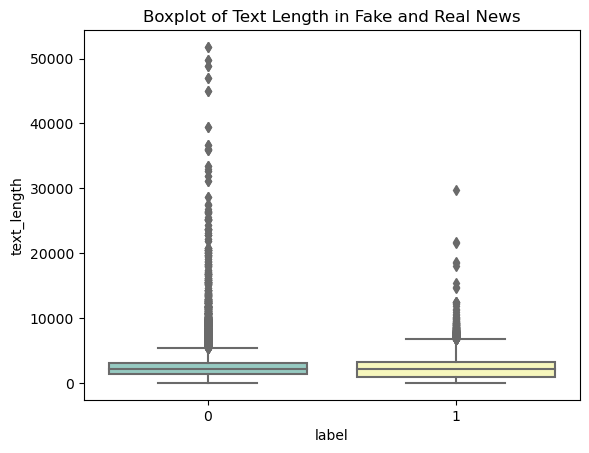

In [20]:
merge_df['text_length'] = merge_df['text'].apply(lambda x: len(x))
sns.boxplot(y='text_length', x='label', data=merge_df, palette="Set3")
plt.title("Boxplot of Text Length in Fake and Real News")
plt.show()

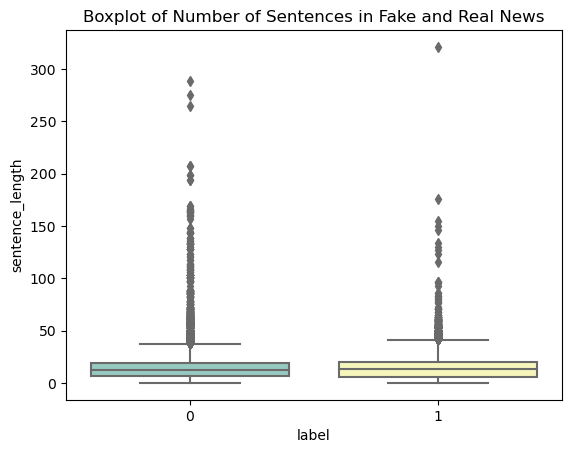

In [21]:
# boxplot of length of sentences between fake and real news
merge_df['sent_tokens'] = merge_df['text'].apply(sent_tokenize)
merge_df['sentence_length'] = merge_df['sent_tokens'].apply(len)
sns.boxplot(y='sentence_length', x='label', data=merge_df, palette="Set3")
plt.title("Boxplot of Number of Sentences in Fake and Real News")
plt.show()

In [22]:
# clean our text and split them
def preprocess_text(x):
  cleaned_text = re.sub(r'[^a-zA-Z\d\s\']+', '', x)
  word_list = []
  for each_word in cleaned_text.split(' '):
    try:
      word_list.append(contractions.fix(each_word).lower())
    except:
      print(x)
  return " ".join(word_list)
  
text_cols = ['text']
for col in text_cols:
  print("Processing column: {}".format(col))
  merge_df[col] = merge_df[col].apply(lambda x: preprocess_text(x))
  
for col in text_cols:
    print("Processing column: {}".format(col))
    merge_df[col] = merge_df[col].apply(word_tokenize)

Processing column: text
Processing column: text


In [23]:
#find stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ruhir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<Axes: >

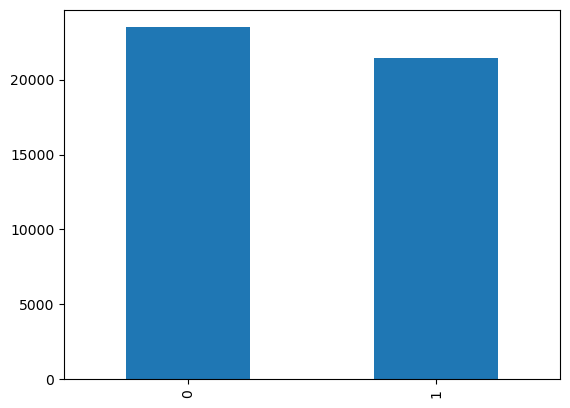

In [24]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
merge_df['text'] = merge_df['text'].apply(lambda x: ' '.join([word for word in x if word not in (stop)]))
merge_df['label'].value_counts().plot(kind = 'bar')

C:\Users\ruhir\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


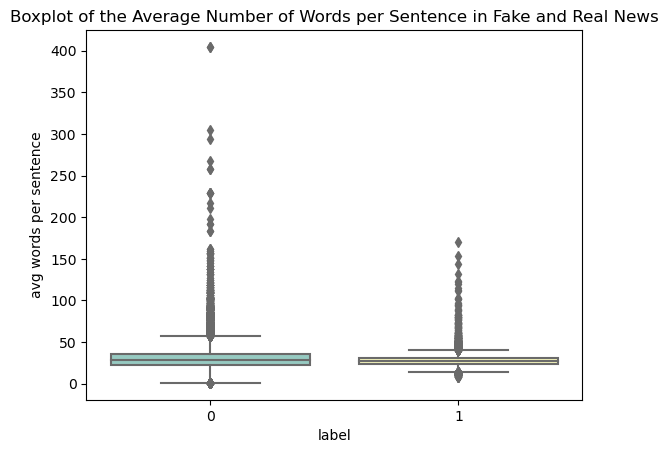

In [25]:
# tokenize words within the sequences
merge_df['sent_word_tokens'] = merge_df['sent_tokens'].apply(lambda x: [word_tokenize(each_sentence) for each_sentence in x])
# Clean the punctuations
def get_seq_tokens_cleaned(seq_tokens):
  no_punc_seq = [each_seq.translate(str.maketrans('', '', string.punctuation)) for each_seq in seq_tokens]
  sent_word_tokens = [word_tokenize(each_sentence) for each_sentence in no_punc_seq]
  return sent_word_tokens

# Count the avg number of words in each sentence
def get_average_words_in_sent(seq_word_tokens):
  return np.mean([len(seq) for seq in seq_word_tokens])

#plot average number of words per sentence
merge_df['sent_word_tokens'] = merge_df['sent_tokens'].apply(lambda x: get_seq_tokens_cleaned(x))
merge_df['avg words per sentence'] = merge_df['sent_word_tokens'].apply(lambda x: get_average_words_in_sent(x))

sns.boxplot(y='avg words per sentence', x='label', data=merge_df, palette="Set3")
plt.title("Boxplot of the Average Number of Words per Sentence in Fake and Real News")
plt.show()

In [26]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [27]:
merge_df1["text"] = merge_df1["text"].apply(wordopt)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [29]:
x = merge_df1["text"]
y = merge_df1["label"]

In [30]:
print(x)

0        if a black student was assaulted by a white un...
1        the obama family ended their eight year reside...
2        obama s historic embracing the communists tour...
3         it s really interesting to hear this panel go...
4        president trump put north korea s brutal dicta...
                               ...                        
44893    on friday s broadcast of hbo s  real time   fo...
44894    washington  reuters    u s  attorney general l...
44895    washington  reuters    u s secretary of defens...
44896    mexico city  reuters    adolfo lagos  the head...
44897    tokyo  reuters    japanese deputy prime minist...
Name: text, Length: 44898, dtype: object


In [31]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
44893    0
44894    1
44895    1
44896    1
44897    1
Name: label, Length: 44898, dtype: int64


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()

In [34]:
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [35]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

In [36]:
LR.fit(xv_train,y_train)

LogisticRegression()

In [37]:
pred_lr=LR.predict(xv_test)
LR.score(xv_test, y_test)

0.9853006681514477

In [38]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5884
           1       0.98      0.99      0.98      5341

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [39]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [40]:
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [41]:
pred_dt = DT.predict(xv_test)
DT.score(xv_test, y_test)

0.9960801781737194

In [42]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5884
           1       1.00      0.99      1.00      5341

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



In [43]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=0)

In [44]:
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [45]:
pred_rfc = RFC.predict(xv_test)
RFC.score(xv_test, y_test)

0.9897550111358575

In [46]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5884
           1       0.99      0.99      0.99      5341

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [47]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(xv_train, y_train)

MultinomialNB()

In [48]:
pred_nb  = NB.predict(xv_test)
print(classification_report(y_test , pred_nb))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5884
           1       0.94      0.92      0.93      5341

    accuracy                           0.94     11225
   macro avg       0.94      0.93      0.94     11225
weighted avg       0.94      0.94      0.94     11225



In [49]:
Accuracy = NB.score(xv_test, y_test)
print(Accuracy*100)

93.53229398663697


In [50]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import PassiveAggressiveClassifier
PAC =PassiveAggressiveClassifier(max_iter=50)

In [51]:
PAC.fit(xv_train, y_train)
predict = PAC.predict(xv_test)

In [52]:
print(classification_report(y_test , predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5884
           1       0.99      0.99      0.99      5341

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [53]:
score = accuracy_score(y_test, predict)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.42%


In [54]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Real News"

In [55]:
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)
    pred_NB  = NB.predict(new_xv_test)
    pred_PAC = PAC.predict(new_xv_test)
    

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nRFC Prediction: {} \nNB Prediction: {} \nPAC Prediction {}".format(output_lable(pred_LR[0]), output_lable(pred_DT[0]), output_lable(pred_RFC[0]), output_lable(pred_NB[0]), output_lable(pred_PAC[0])))

In [56]:
news = str(input())
manual_testing(news)

the obama family ended their eight year reside


LR Prediction: Fake News 
DT Prediction: Fake News 
RFC Prediction: Fake News 
NB Prediction: Fake News 
PAC Prediction Fake News
